In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart.csv


# INDEX(EDA)
## 1. 데이터셋 소개. 및 사용 패키지
## 2. 자료에 대한 소개
### 2.1 어떠한 변수가 있는가?
- 명목형 변수
- 양적 변수

### 2.2 각 변수의 형태
- 전체 변수
- 명목형 변수
- 양적 변수

### 2.3 양적 변수들의 상관관계를 파악하기 위한 상관계수 테이블

## 3. k-means
- 엘보우(elbow) 기법
- 실루엣(silhouette) 기법
- k-means 전 / 후 시각화 비교
- k-means 산점도 시각화 

## 4. 랜덤포레스트
- 랜덤포레스트 개념
- 랜덤포레스트 학습
- 랜덤포레스트 시각화

## 1. 제공된 DataSet의 설명 및 사용 패키지
#### age : 나이
#### sex : 성별(0 : 여성; 1 : 남성)
#### cp : 가슴통증 유형(0 = 증상 없음 ; 1 = 비전형적 협심증; 2 = 비협심증 통증; 3 = 전형적인 협심증)
#### trestbps : 평시 혈압 
#### chol : 혈중 콜레스테롤 농도
#### fbs : 공복시 혈당 > 120mg/dl(0 = False; 1 = True)
#### restecg : 안정 심전도 결과(0 = 좌심실 비대; 1 = 정상; 2 = ST-T파 비정상)
#### thalach : 최대 심박수
#### exang : 협심증 유발 운동(0 = no; 1 = yes)
#### old peak : 비교적 안정되기까지 운동으로 유발되는 ST
#### slope : 최대 운동 ST segment의 기울기(0 = 하강; 1 = 평면; 2 = 상승)
#### ca : 형광 투시된 주요 혈관의 수(0~3; 4 = NA)
#### thal : 0 = NA; 1 = 해결된 결함; 2 = 정상; 3 = 해결가능한 결함
#### target : 심장병 진단(0 = False; 1 = True)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,classification_report
from sklearn.tree import export_graphviz
import six
from sklearn import tree
# Convert to png using system command (requires Graphviz)
from subprocess import call
# Display in jupyter notebook
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
heart=pd.read_csv('../input/heart.csv')

In [3]:
heart.shape

(303, 14)

## 2 자료에 대한 소개
### 2.1 어떤 변수가 있는가?

In [4]:
# 1.3 명목형 자료의 자료형을 문자로 변환
#위의 설명을 읽고 명목형 자료를 바꿔주면서 결측치가 추가된다
heart.cp = heart.cp.replace([0,1,2,3],['no_pain','Atypical angina','Angina pain','Typical angina'])#가슴통증 유형
heart.restecg = heart.restecg.replace([0,1,2],['Left ventricular hypertrophy','nomal','ST-T wave abnormal'])#안정 심전도 결과
heart.slope = heart.slope.replace([0,1,2],['descent','plane','Increase'])
heart.thal= heart.thal.replace([0,1,2,3],[np.nan,'Resolved Defects','nomal','Resolveable Defects'])

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null object
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null object
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null object
ca          303 non-null int64
thal        301 non-null object
target      303 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 33.2+ KB


### 명목형 자료
  'sex','cp','fbs','restecg','exang','slope','ca','thal'
 
### 연속형 자료
  'age','chol','trestbps','thalach','oldpeak'

## 2.2 자료가 어떠한 형태를 띄는가?

In [6]:
heart.head(10)

age  sex               cp  trestbps  chol  fbs  \
0   63    1   Typical angina       145   233    1   
1   37    1      Angina pain       130   250    0   
2   41    0  Atypical angina       130   204    0   
3   56    1  Atypical angina       120   236    0   
4   57    0          no_pain       120   354    0   
5   57    1          no_pain       140   192    0   
6   56    0  Atypical angina       140   294    0   
7   44    1  Atypical angina       120   263    0   
8   52    1      Angina pain       172   199    1   
9   57    1      Angina pain       150   168    0   

                        restecg  thalach  exang  oldpeak     slope  ca  \
0  Left ventricular hypertrophy      150      0      2.3   descent   0   
1                         nomal      187      0      3.5   descent   0   
2  Left ventricular hypertrophy      172      0      1.4  Increase   0   
3                         nomal      178      0      0.8  Increase   0   
4                         nomal      163      1      0.6  Increase   0   
5                         nomal      148      0      0.4     plane   0   
6  Left ventricular hypertrophy      153      0      1.3     plane   0   
7                         nomal      173      0      0.0  Increase   0   
8                         nomal      162      0      0.5  Increase   0   
9                         nomal      174      0      1.6  Increase   0   

                  thal  target  
0     Resolved Defects       1  
1                nomal       1  
2                nomal       1  
3                nomal       1  
4                nomal       1  
5     Resolved Defects       1  
6                nomal       1  
7  Resolveable Defects       1  
8  Resolveable Defects       1  
9                nomal       1

In [7]:
heart.isnull().sum()# Null값 확인, 혈관수와 결함을 나타내는 파라메터에서 결측치를 각각 5,2개 확인

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

### 전체 데이터들의 분포 시각화

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


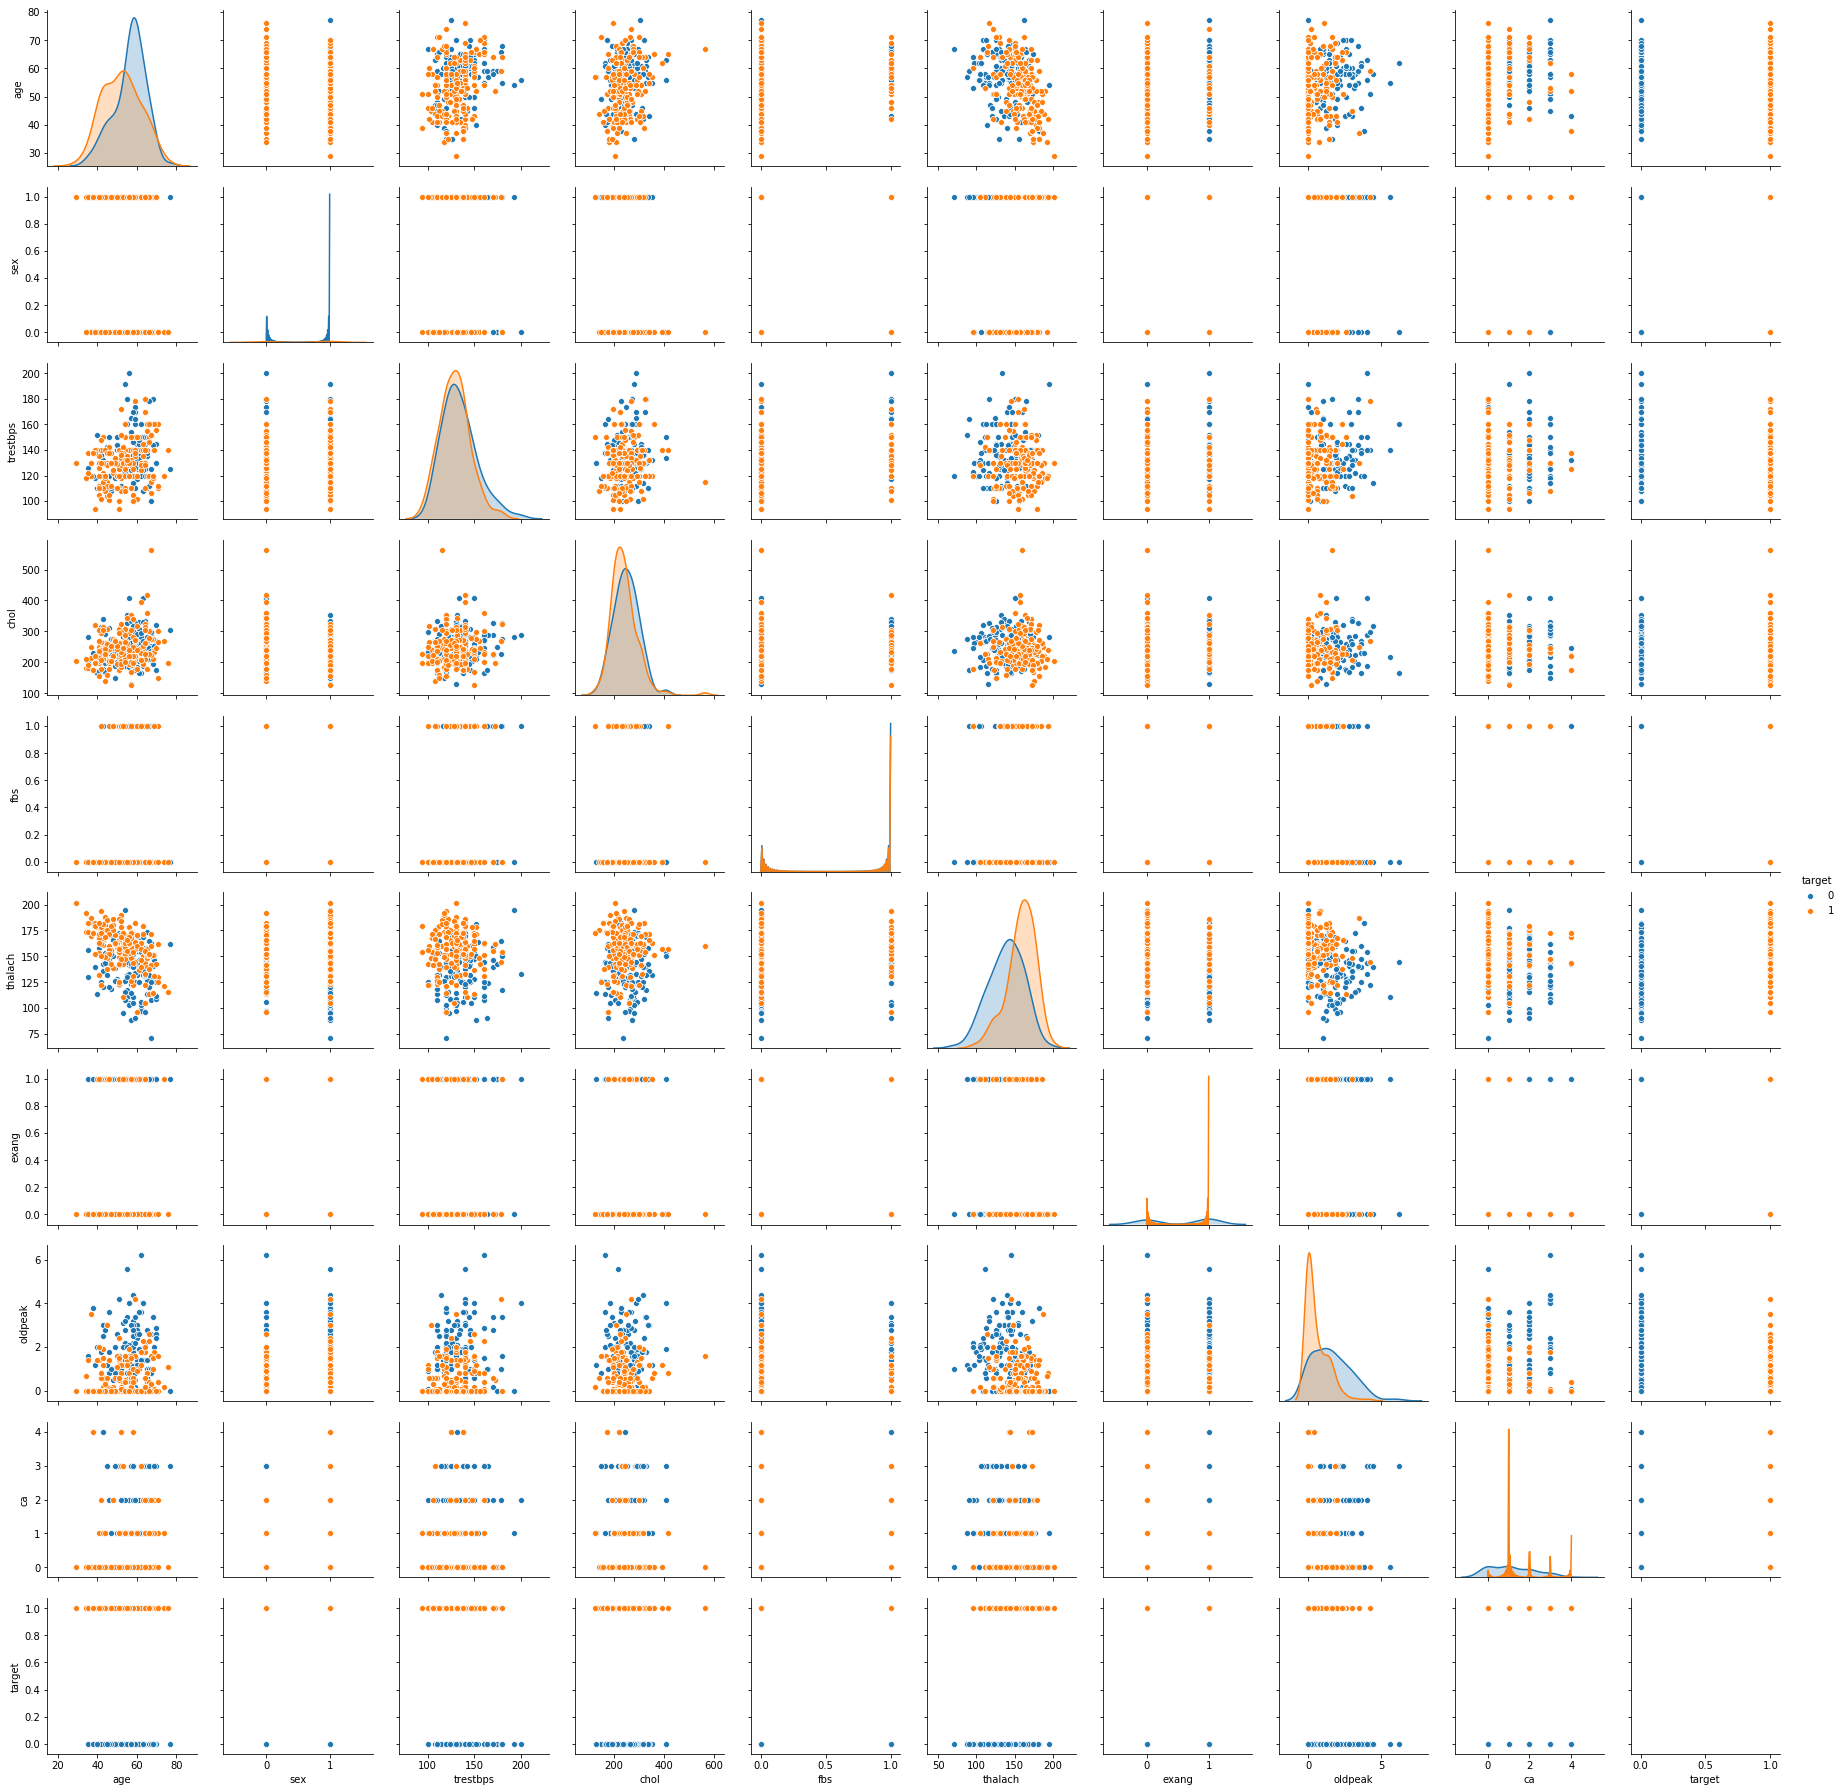

In [8]:
sns.pairplot(heart.dropna(), hue='target')

- 위를 통해서 데이터들의 분포를 알수 있었으나. 명목형 변수와 양적 변수가 섞여있으며, 모든 데이터들이 한번에 출력되어 보기가 힘들다.
- 명목형 변수와 양적 변수를 나누어 정리하여 시각화하자

### 심장병 발병여부에 따른 분류

Text(0.5, 1.0, 'Heart Disease')

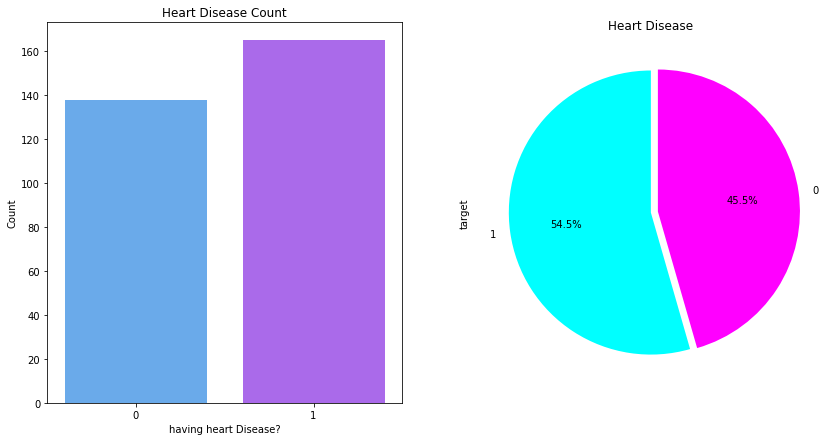

In [9]:
fig,ax=plt.subplots(1, 2, figsize = (14,7))
sns.countplot(data=heart, x='target', ax=ax[0],palette='cool')
ax[0].set_xlabel("having heart Disease?")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
heart['target'].value_counts().plot.pie(explode=[0,0.05],startangle=90, autopct='%0.1f%%',ax=ax[1],cmap='cool')
plt.title("Heart Disease")

In [10]:
print(heart['target'].value_counts())
target_df=heart[heart.target==1]
nontarget_df=heart[heart.target==0]

1    165
0    138
Name: target, dtype: int64


- 전체 인구중 질병이 발생한 사람은 총 인구의 54.5%를 차지하고 있다.
- 심장병이 있는 그룹과 없는 그룹을 기준으로 데이터를 분석하여보자

### 명목형 변수

In [11]:
searchList=['sex','cp','fbs','restecg','exang','slope','ca','thal']
# 명목형 변수 리스트

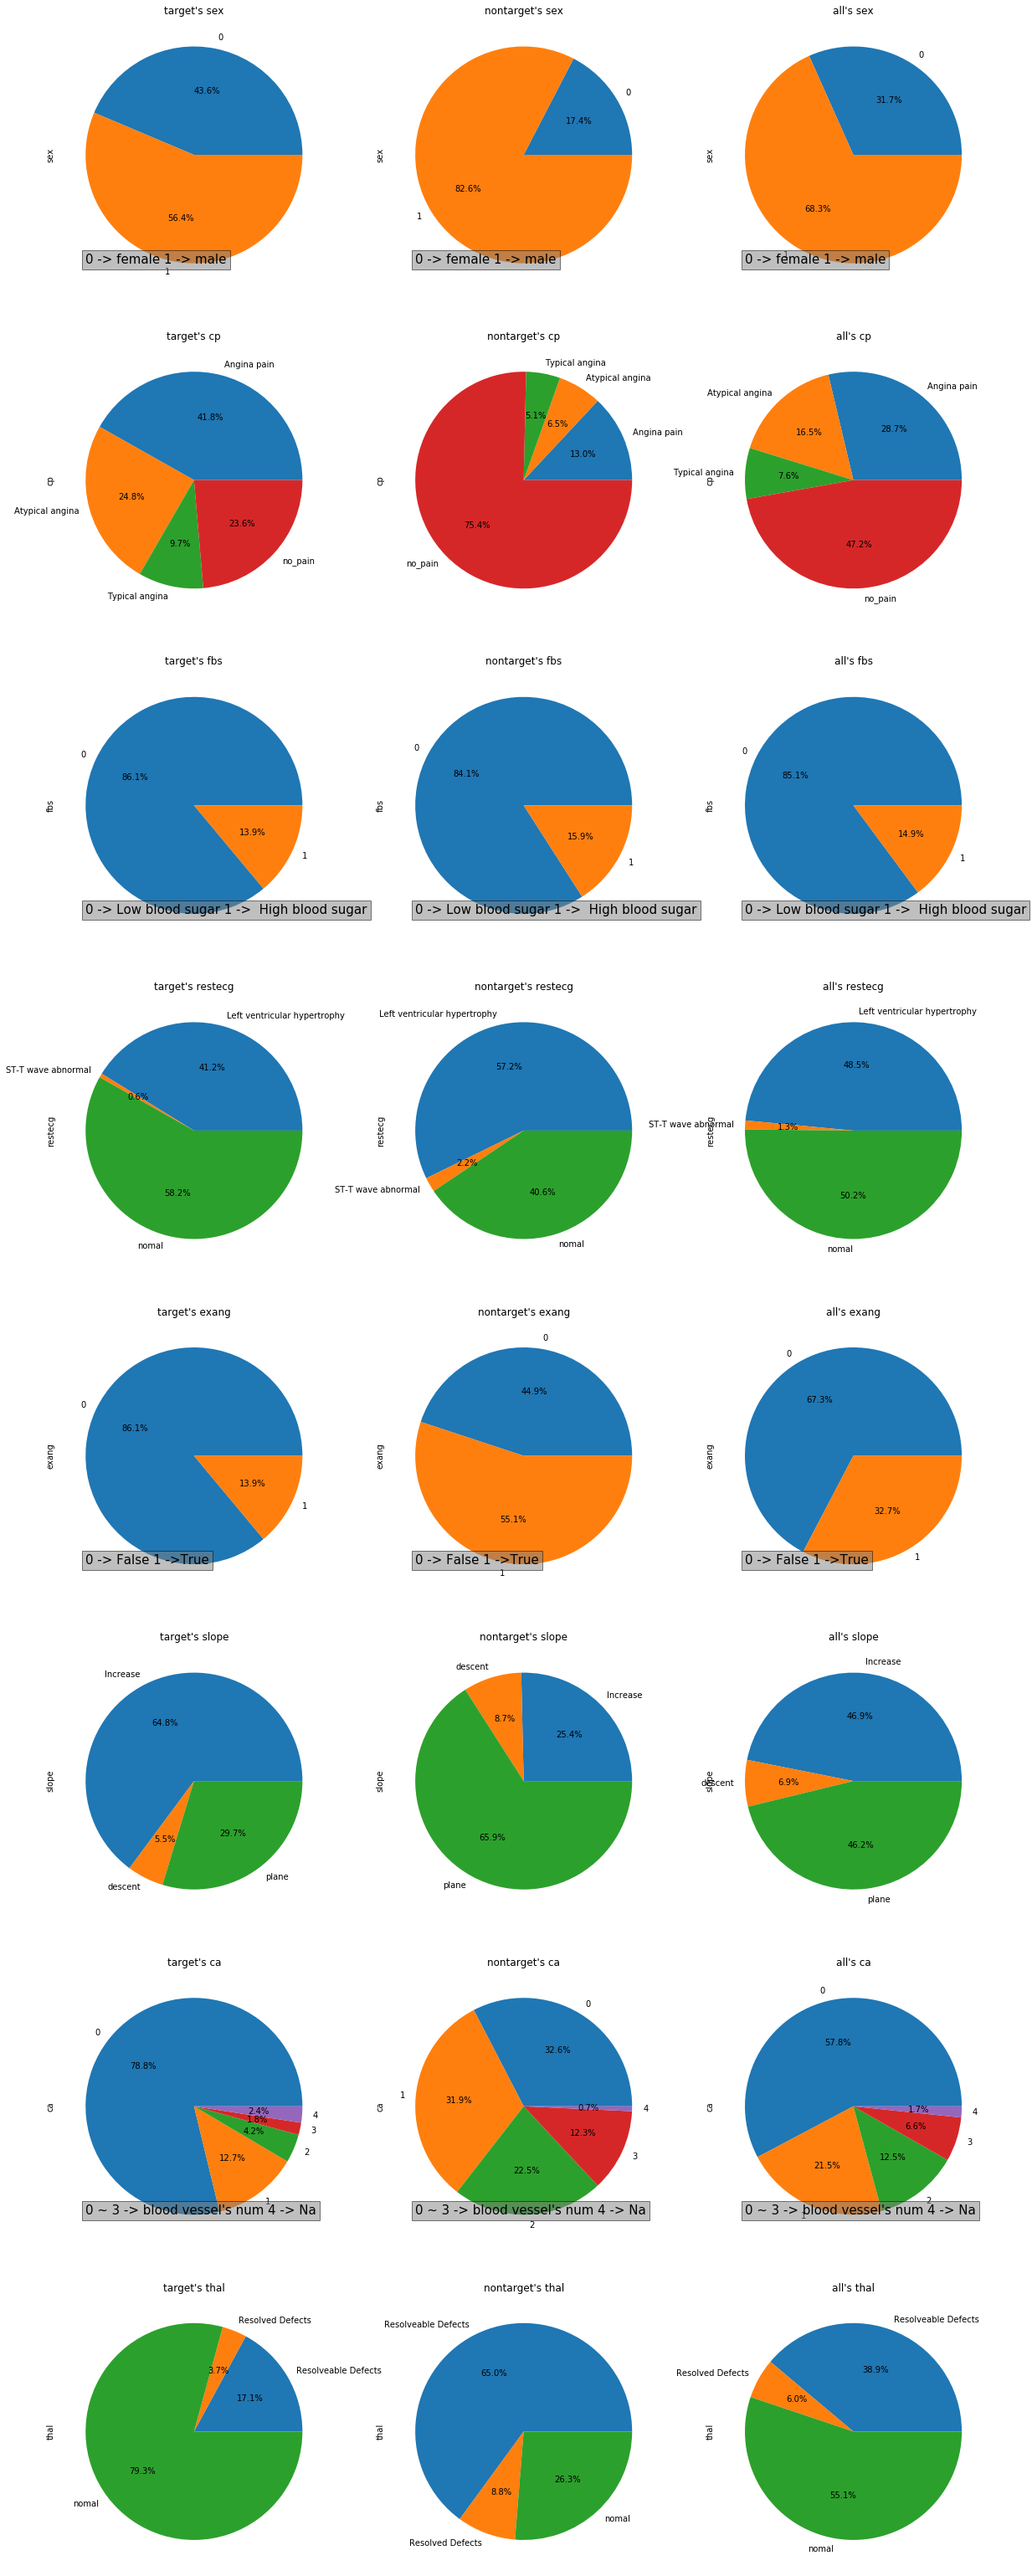

In [12]:
def showdetail(index):
    if index is 'sex':
        plt.text(-1,-1,'0 -> female 1 -> male',fontsize=15,bbox=dict(facecolor='gray', alpha=0.5))
    elif index is 'fbs':
        plt.text(-1,-1,'0 -> Low blood sugar 1 ->  High blood sugar',fontsize=15,bbox=dict(facecolor='gray', alpha=0.5))        
    elif index is 'exang':    
        plt.text(-1,-1,'0 -> False 1 ->True',fontsize=15,bbox=dict(facecolor='gray', alpha=0.5))        
    elif index is 'ca':    
        plt.text(-1,-1,'0 ~ 3 -> blood vessel\'s num 4 -> Na',fontsize=15,bbox=dict(facecolor='gray', alpha=0.5))        

fig,ax=plt.subplots(len(searchList), 3, figsize = (20,7*len(searchList)))
axnum=1
#explode=[0.02  for x in range(len(heart[index].cat.categories))],
for index in searchList:
    plt.subplot(len(searchList),3,axnum)
    plt.title('target\'s '+index)
    target_df[index].dropna().value_counts().sort_index().plot.pie(
                                                      autopct='%0.1f%%')
    showdetail(index)
    axnum+=1
    
    plt.subplot(len(searchList),3,axnum)    
    plt.title('nontarget\'s '+index)
    nontarget_df[index].dropna().value_counts().sort_index().plot.pie(
                                                         autopct='%0.1f%%')
    showdetail(index)
    axnum+=1
    
    plt.subplot(len(searchList),3,axnum)    
    plt.title('all\'s '+index)
    heart[index].dropna().value_counts().sort_index().plot.pie(
                                                  autopct='%0.1f%%')
    showdetail(index)    
    axnum+=1

### 위의 결과를 통해서 알수 있는 추론
- 위의 그래프들은 각각 심장병이 있는 그룹 심장병이 없는 구룹, 전체 그룹의 각각 데이터별 비율을 나타낸다. 세 비율이 모두 비슷한 모양을 나타낼 경우 해당 데이터는 심장병에 영향을 끼치지 않는다고 생각할수 있으며, 차이가 있을 경우 심장병에 영향을 끼친다고 유추할수 있다.
- 심장병이 있는 사람과 심장병이 없는 사람은 남성이 더 많다. 하지만 표본에 있는 남성과 여성이 68.3%와 31.7%로써 2배이상 차이가 나므로 이 자체만으로 남성보다 여성이 심장병에 잘 걸릴수 있다 라는 가설을 세우기엔 부적합하다고 생각할수 있다.
- 가슴통증의 유형을 보게될 경우 심장병이 있는 사람들의 경우 76.4%의 사람들이 가슴통증을 가지며 심장병이 없는 사람의 경우 24.6%의 사람이 가슴통증을 가지고 있는것으로보아 가슴통증과 심장병사이에 관계가 있음을 유추할 수 있다
- 공복시 혈당이 120mg/dl이 넘는 사람. 즉 당뇨환자의 경우 심장병을 가진사람과 가지지 않은 사람이 비슷한 분포를 보이며 심장병과 무관하다고 유추해볼수 있다
- 안전 신전도 검사 결과또한 심장병을 가진 사람과 가지지 않은 그룹간 정상적인 사람의 비율이 58.2%, 40.6%로써 차이를 보이며 좌심실 비대에 해당하는 사람들또한 41.2%, 57.2%로써 신전도 검사 결과가 심장병과 관계가 있음을 유추할수 있다.
- 심장병이 있는 사람과 없는 사람간 협심증 유발가능성이 높은 운동을 하였는지에 대한 조사결과 심장병이 있는 그룹의 사람들이 협심증을 유발하는 운동을 한 사람들이 적고 심장병이 없는 사람들 그룹은 상대적으로 많은것을 보아 운동여부또한 심장병과 관계가 있음을 유추해 볼수 있다.
- 심장병을 가진 사람과 가지지 않은사람간에 최대 운동 ST segment의 기울기를 보았을때 가지지않은 사람과 가진 그룹이 각각 64.8% 25.4% 증가하는것을 알수 있었으며 평탄한 기울기를 가진 사람은 29.7% 65.9%를 가지며 감소하는 그래프를 가진 사람은 5.5% 8.7%로써 큰 차이를 보이지 않는것을 보아 심장병과 최대 운동 ST segment의 기울기의 관계는 최대 운동 ST segment의 기울기가 상승하는 사람의 경우 심장병의 발생율이 높다는것을 윷할수 있다.
- 형광 투시된 주요 혈관의 수의 분포를 보게 될 경우 심장병이 있는 그룹은 19.3%의 사람들이 1개이상의 형광 투시된 혈관수를 가지며 심장병이 없는 그룹의 사람들은 34.1%의 사람들이 1개이상의 형광투시된 혈관수를 가진다. 이를 통해 심장병과 형광 투시된 주요 혈관의 수는 무관하지 않다는것을 유추할 수 있다
- 심장병을 가진 그룹과 가지지 않은 그룹간 결함을 가지고 해결할수 있는지, 없는지에 대한 표에서 심장병을 가진 사람그룹에서 정상적인 사람을 많이 찾아 볼 수 있었으며, 심장병을 가지지 않은 그룹의 사람들은 극복가능한 결함을 가진 사람들의 비율이 높은것을 알수 있었으며, 이미 문제를 해결한 사람의 경우 심장병이 없는 사람 그룹에서 더 높은 비율을 보였다


### 양적 변수

In [13]:
continually_index = heart.describe().columns
continually_index

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target'],
      dtype='object')

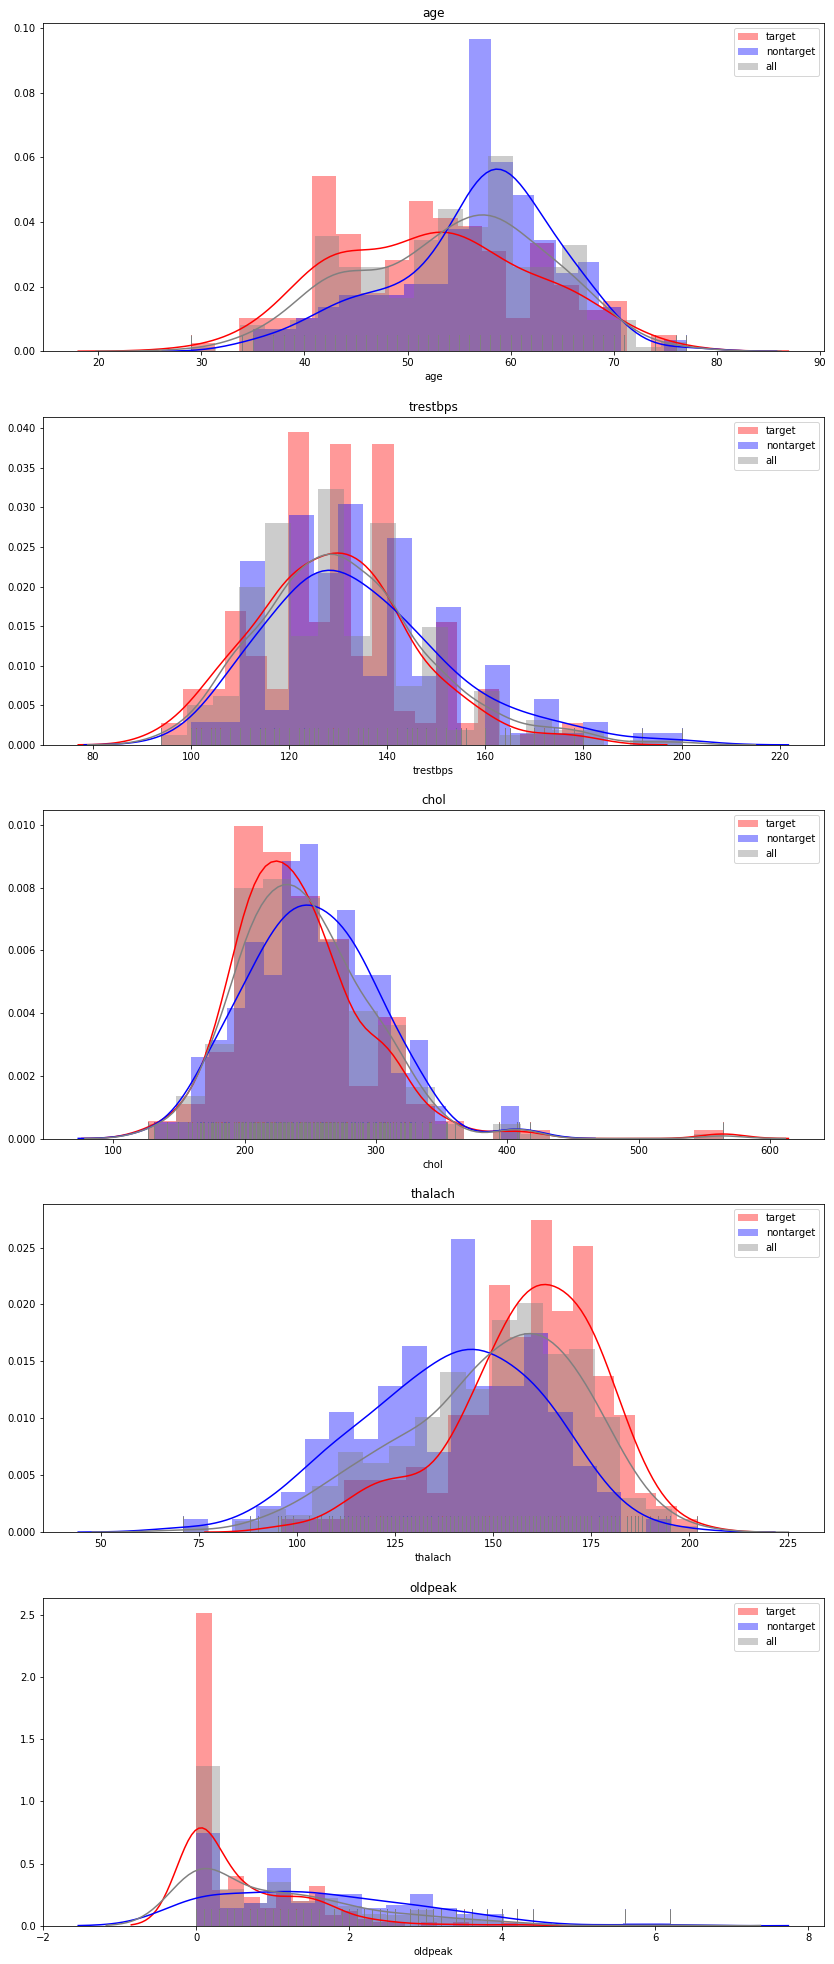

In [14]:
continually_index = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']# 연속형 자료
fig,ax=plt.subplots(len(continually_index), 1, figsize = (14,7*len(continually_index)))
list_couint=1
for index in continually_index:
    plt.subplot(len(continually_index),1,list_couint)
    plt.title(index)
    sns.distplot(target_df[index],bins=20, kde=True, rug=True, color='red',label='target')
    sns.distplot(nontarget_df[index],bins=20,kde=True, rug=True,color='blue',label='nontarget')
    sns.distplot(heart[index],bins=20,kde=True, rug=True,color='gray',label='all')
    plt.legend()
    list_couint+=1
    
    

### 위의 결과를 통해 알수 있는점
- 위의 그래프는 RED : 심장병이 있는 그룹, BLUE : 심장병이 없는 그룹, GRAY : 전체그룹 으로 나누어 시각적으로 각 그룹별 차이를 시각적으로 쉽게 보여준다. 위의 그래프에서 세 그래프가 비슷하게 곂칠경우 해당 데이터는 심장병에 영향을 끼치지 않는다고 유추할수 있으며, 큰 차이를 보일경우 심장병에 영향을 끼친다고 유추할 수 있다

- 심장병과 나이의 관계에서 젊은 사람들에게서 비교적 많이 발생한다는것을 유추할수 있었다.
- 심장병과 평상시 혈압과의 관계는 없다는것을 유추할수 있었다.
- 심장병과 혈중 콜레스테롤 농도간의 관계로써 심장병이 있는 사람들의 그룹이 조금더 낮은 혈중 콜레스테롤 농도를 가지는것을 알수 있었다
- 심장병을 가진 그룹에서 최대 심박수가 더 높게 나타나는것을 알수 있었다.
- 안정되기까지 운동으로 유발되는 ST의 경우 심장병이 있는 그룹이 더욱 빠르게 나타나는것으로 확인된다

### 2.3 양적 변수들의 상관관계를 파악하기 위한 상관계수 테이블

Text(0.5, 1.0, "All's Correlation Table")

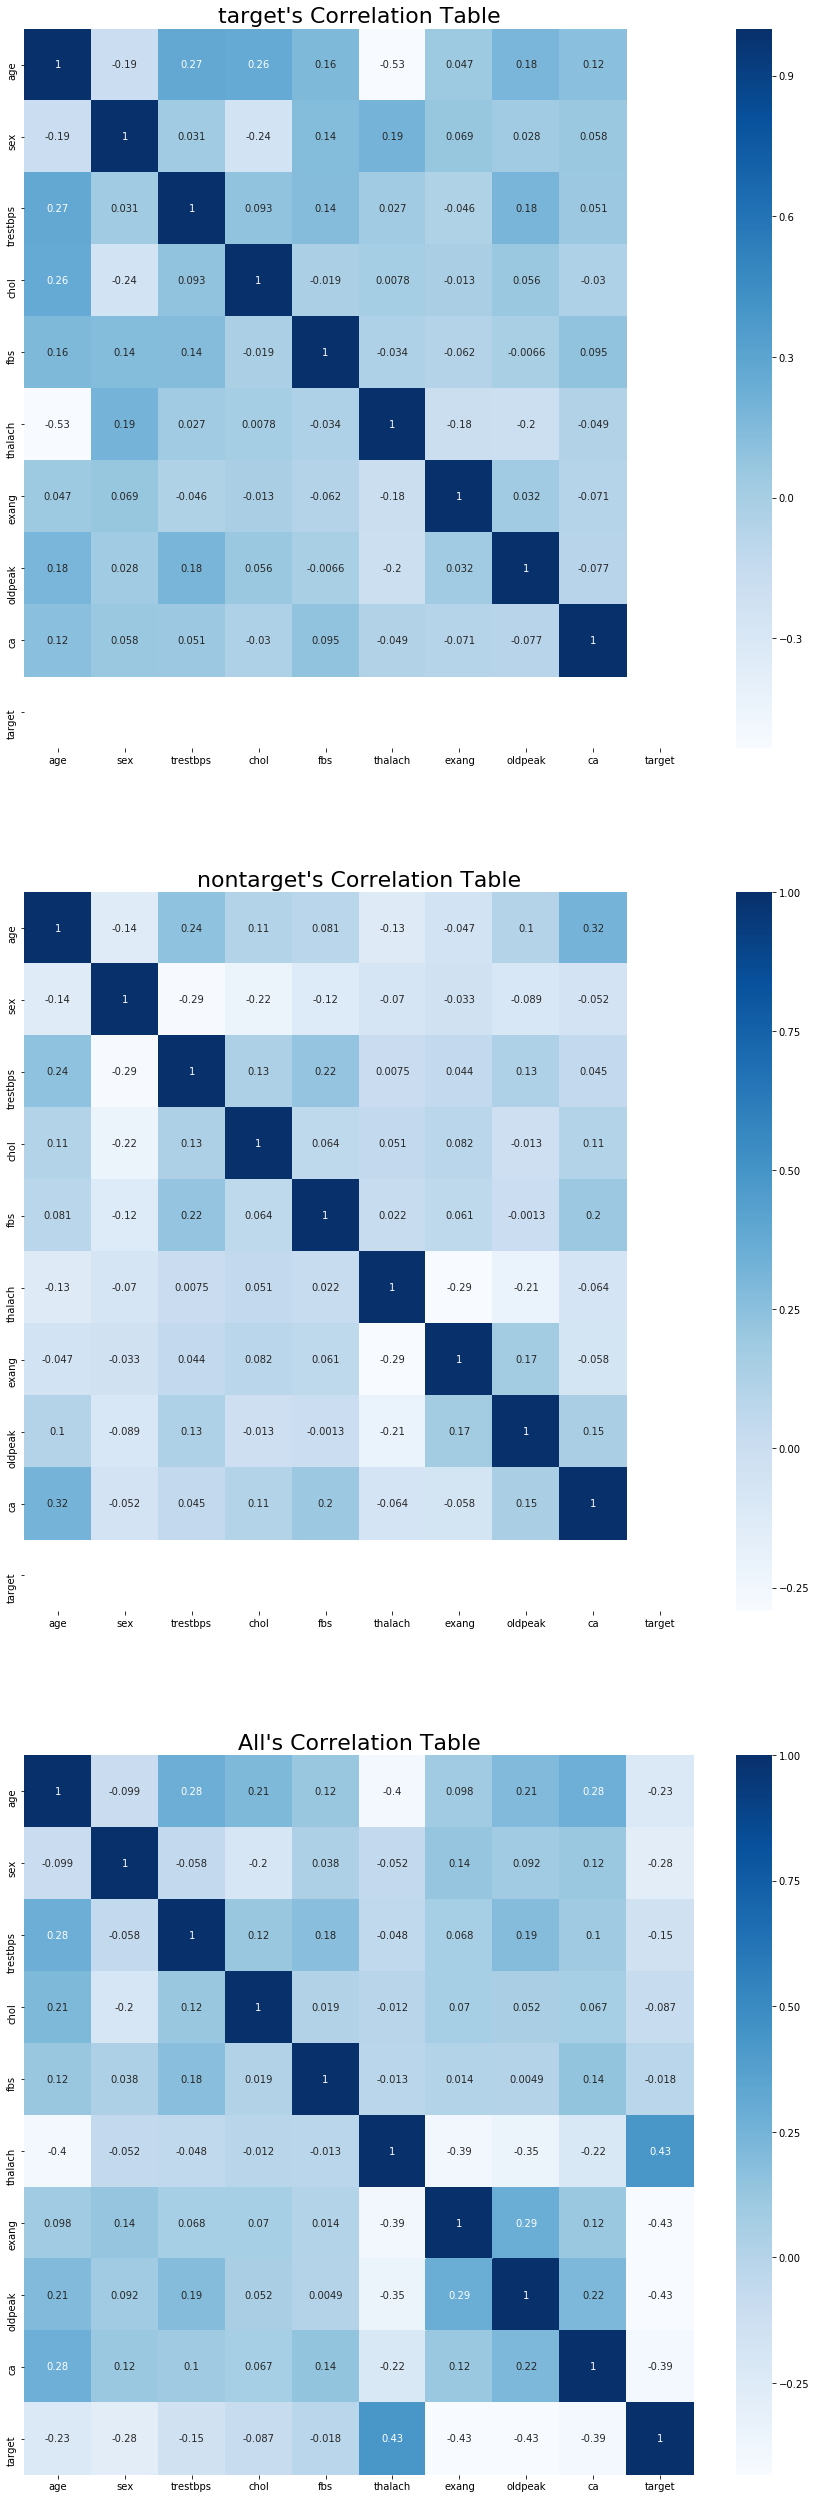

In [15]:
plt.figure(figsize=(15, 45))
plt.subplot(3,1,1)
sns.heatmap(target_df.dropna().corr(), annot = True,cmap='Blues')
plt.title('target\'s Correlation Table', fontsize = 22)
plt.subplot(3,1,2)
sns.heatmap(nontarget_df.dropna().corr(), annot = True,cmap='Blues')
plt.title('nontarget\'s Correlation Table', fontsize = 22)
plt.subplot(3,1,3)
sns.heatmap(heart.dropna().corr(), annot = True,cmap='Blues')
plt.title('All\'s Correlation Table', fontsize = 22)


In [16]:
target_df.dropna().corr(), nontarget_df.dropna().corr(), heart.dropna().corr()

(               age       sex  trestbps      chol       fbs   thalach  \
 age       1.000000 -0.190618  0.274732  0.257504  0.155623 -0.533550   
 sex      -0.190618  1.000000  0.030504 -0.243833  0.140249  0.192361   
 trestbps  0.274732  0.030504  1.000000  0.093119  0.136672  0.027353   
 chol      0.257504 -0.243833  0.093119  1.000000 -0.019024  0.007773   
 fbs       0.155623  0.140249  0.136672 -0.019024  1.000000 -0.034273   
 thalach  -0.533550  0.192361  0.027353  0.007773 -0.034273  1.000000   
 exang     0.047143  0.069368 -0.045778 -0.013118 -0.061980 -0.182239   
 oldpeak   0.175137  0.027595  0.181446  0.055610 -0.006567 -0.195868   
 ca        0.117668  0.057667  0.050823 -0.030408  0.094906 -0.049096   
 target         NaN       NaN       NaN       NaN       NaN       NaN   
 
              exang   oldpeak        ca  target  
 age       0.047143  0.175137  0.117668     NaN  
 sex       0.069368  0.027595  0.057667     NaN  
 trestbps -0.045778  0.181446  0.050823     N

- 심장병이 있는 그룹에선 나이와 최대 심박수가 높은 음의 상관관계를 보였으며, 나이와 평상시 혈압간에 양의 상관도를 보였다
- 심장병이 없는 그룹에선 평상시 심박수와 나이가 양의 상관관계를 보였다.
- 그리고 전체 그룹에선 나이와 최대 심박수가 높은 음의 상관관계를 보이고, 안정되기까지 운동으로 유발되는 ST와 최대 심박수가 음의 상관관계를 보였다

## Kmeans Clustering (k-평균 군집화)

### -군집 분석을 할 때 활용되는 기본 알고리즘이다.
### - k개의 센트로이드를 기준으로 클러스트링을 진행하여 k개의 집단을 만든다.

## 엘보우 기법

### 여러 k개를 테스트해 보면 obj가 급격히 줄어들다가 갑자기 완만해 지는 경계가 나타나는데
### 그 경계가 나타나면 그 포인트를 k개로 삼는다.

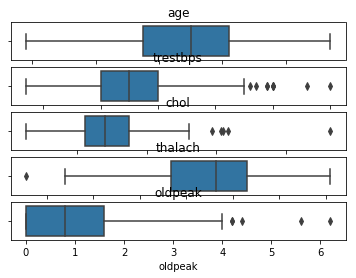

In [17]:
heart1=pd.read_csv('../input/heart.csv')
heart2=pd.read_csv('../input/heart.csv')
targets=heart1.target
heart1=heart1.drop('target',axis=1)
heart1.head(10)
scaler = preprocessing.RobustScaler()
heart1=scaler.fit_transform(heart1)
fig,ax=plt.subplots(len(['age', 'trestbps', 'chol', 'thalach', 'oldpeak']), 1)
#연속형 자료들의 이상치 확인
list_couint=1
for index in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    plt.subplot(len(['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),1,list_couint)
    plt.title(index)
    sns.boxplot(heart[index])
    list_couint+=1

In [18]:
# 스케일링 -알고리즘에 적용하기에 앞서서 모델링에 알맞을 형태로 데이터를 처리
from sklearn.preprocessing import RobustScaler
scaler = preprocessing.RobustScaler() 
scaler.fit_transform(heart2)
feature = scaler.fit_transform(heart2)


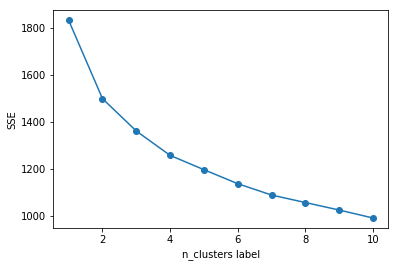

In [19]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('n_clusters label') 
    plt.ylabel('SSE')
    plt.show()

elbow(feature)

# 실루엣 기법

### - 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타낸다.
#### 1. 클러스터 안의 거리가 짧을 수록 좋고(cohesion), 다른 클러스터와의 거리는 멀수록 좋다(separation)
#### 2. 실루엣은 -1 부터 1사이의 값을 가진다. (실루엣이 1일수록 잘 부합하는 거고, -1일수록 필요없는 데이터)
#### 3. 높을 수록 좋다.

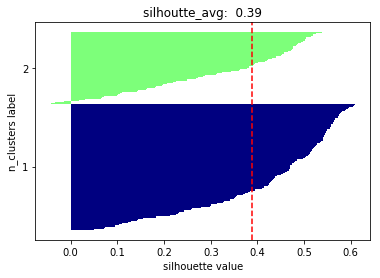

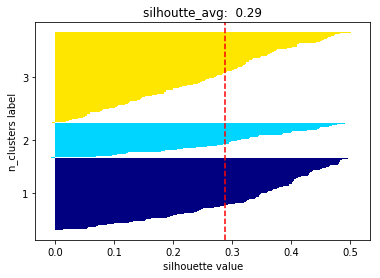

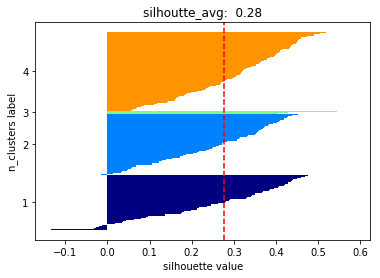

In [20]:
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

# 이코드에서 데이터 X와 X를 임의의 클러스터 개수로 계산한 k-means 결과인
# y
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
    
    silhoutte_avg = np.mean(silhouette_vals)
    plt.title("silhoutte_avg: {:5.2f}".format(silhoutte_avg))
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('n_clusters label')
    plt.xlabel('silhouette value')
    plt.show()

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=2, algorithm='auto', random_state=42)
km2 = KMeans(n_clusters=3, algorithm='auto', random_state=42)
km3 = KMeans(n_clusters=4, algorithm='auto', random_state=42)
y_km = km.fit_predict(heart2)
y_km2 = km2.fit_predict(heart2)
y_km3 = km3.fit_predict(heart2)
plotSilhouette(heart2, y_km)
plotSilhouette(heart2, y_km2)
plotSilhouette(heart2, y_km3)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100,algorithm='auto').fit(heart1)
kmeans_target = len(kmeans.labels_[kmeans.labels_== 1])
kmeans_nontarget = len(kmeans.labels_[kmeans.labels_== 0])
print(kmeans_target,kmeans_nontarget)

102 201


Text(0.5, 1.0, "K-means's result")

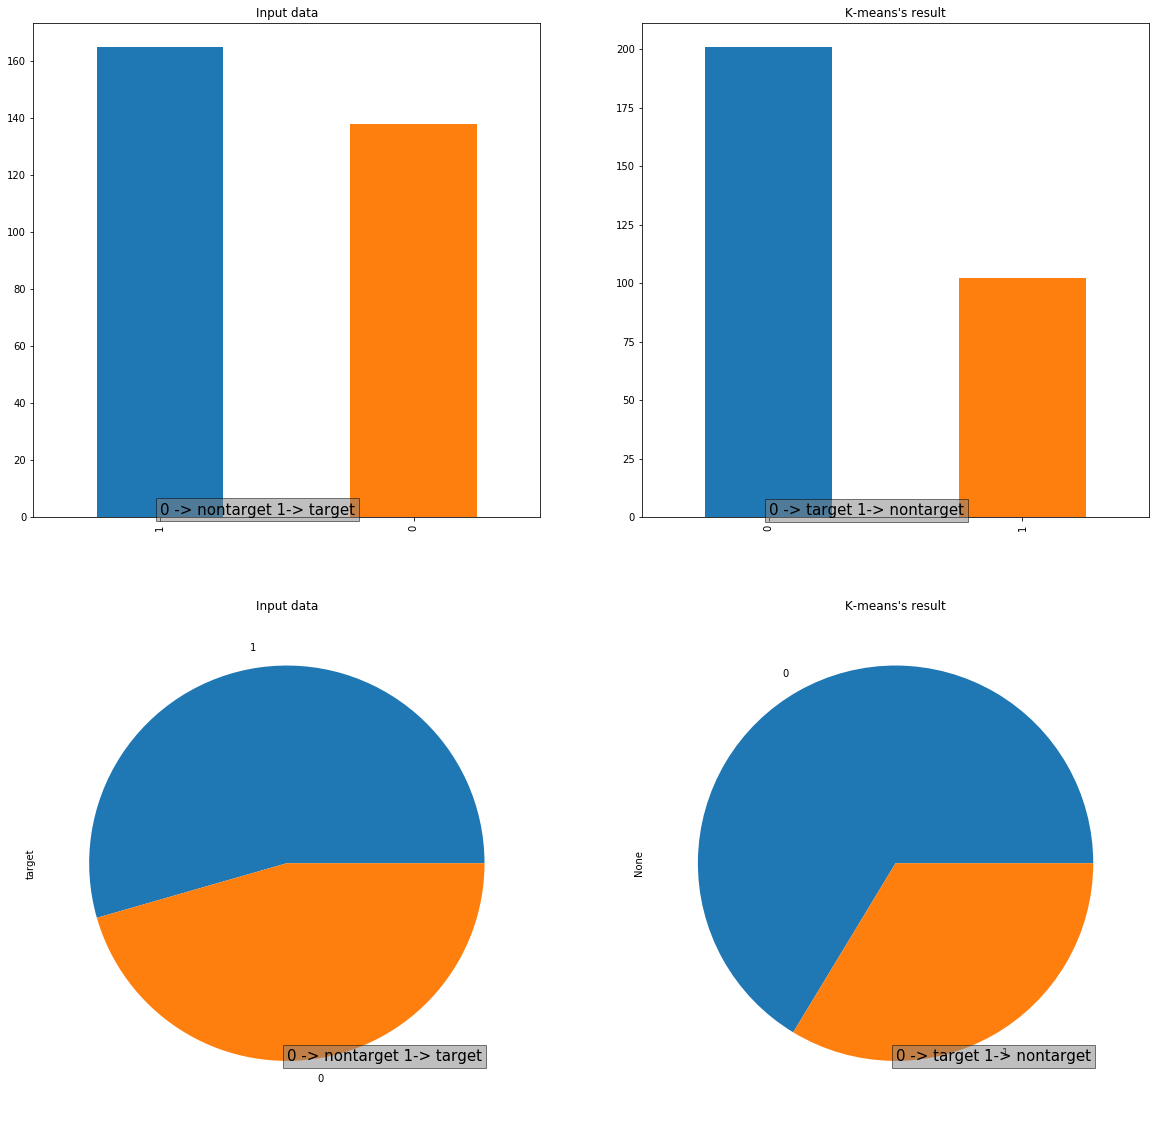

In [22]:
kmeans_se=pd.Series(kmeans.labels_)
fig,ax=plt.subplots(2,2, figsize = (20,20))
plt.subplot(2,2,3)
heart['target'].dropna().value_counts().plot.pie()
plt.text(0,-1,'0 -> nontarget 1-> target',fontsize=15,bbox=dict(facecolor='gray', alpha=0.5))
plt.title('Input data')
plt.subplot(2,2,4)
kmeans_se.dropna().value_counts().plot.pie()
plt.text(0,-1,'0 -> target 1-> nontarget',fontsize=15,bbox=dict(facecolor='gray', alpha=0.5))
plt.title('K-means\'s result')


plt.subplot(2,2,1)
heart['target'].dropna().value_counts().plot.bar()
plt.text(0,1,'0 -> nontarget 1-> target',fontsize=15,bbox=dict(facecolor='gray', alpha=0.5))
plt.title('Input data')
plt.subplot(2,2,2)
kmeans_se.dropna().value_counts().plot.bar()
plt.text(0,1,'0 -> target 1-> nontarget',fontsize=15,bbox=dict(facecolor='gray', alpha=0.5))
plt.title('K-means\'s result')

In [23]:
# 먼저 생성된 결과를 데이터 프레임으로 변환한다.
feature_df = pd.DataFrame(heart2)

In [24]:
import numpy as np
from sklearn.manifold import TSNE

# 2개의 차원으로 축소
#데이터의 분류를 시각화해서 확인하고 싶으나, 
#다차원의 데이터를 눈으로 확인하기란 불가능에 가깝다. 
#단, 차원을 줄이면 가능하다. 
#차원을 축소하여 feature를 2로 줄인 후 그래프를 그려 확인해볼 수 있다.
transformed = TSNE(n_components=2).fit_transform(feature_df)
transformed.shape

(303, 2)

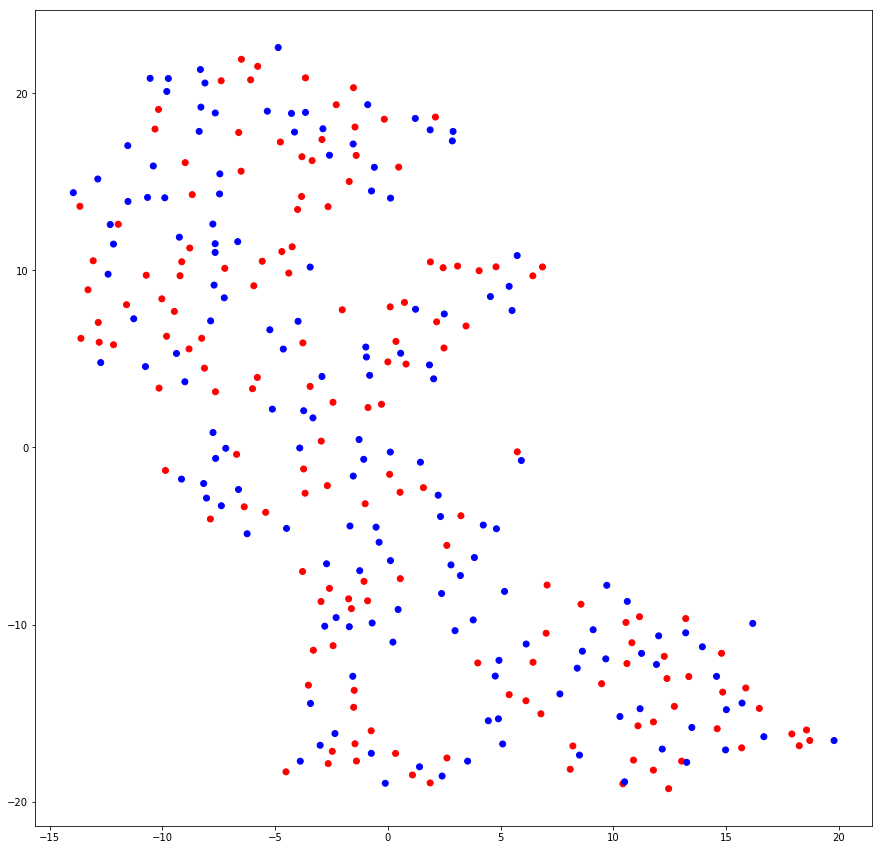

In [25]:
xs = transformed[:,0]
ys = transformed[:,1]
colors=np.array( ['red','blue'])
bins = np.arange(xs.shape[0]) % 2
fig,ax=plt.subplots(1,1, figsize = (15,15))
plt.scatter(xs,ys,c=colors[bins])#라벨은 색상으로 분류됨


In [26]:
X_train, X_test, y_train, y_test = train_test_split(heart1,
                                                    targets
                                                    ,test_size=0.3
                                                    ,random_state =0
                                                   )

print(len(X_train),len(X_test),len(y_train),len(y_test))


# 학습
forest = RandomForestClassifier(n_estimators=100, random_state = 1)
forest.fit(X_train, y_train)

# 예측
y_pred = forest.predict(X_test)
#print(y_pred)
#print(list(y_test))
# from sklearn import metrics 

print('test 갯수 : ',len(y_test),'error : ',(y_test!=y_pred).sum())
print('정확도 :',accuracy_score(y_test, y_pred))
# print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


print(classification_report(y_test,y_pred))
#https://frhyme.github.io/machine-learning/clf_%ED%8F%89%EA%B0%80%ED%95%98%EA%B8%B0/
# precision : 예측한 값중 맞은값의 비율
# recall    : 실제 0또는 1인값이 0또는 1로 판별된 비율
# f1-score  : precision, recall 의 평가
# support   : 해당 클래스에 있는 실제 응답의 샘플 수

212 91 212 91
test 갯수 :  91 error :  15
정확도 : 0.8351648351648352
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [27]:
estimator = forest.estimators_[0]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = heart.columns[:13],
                class_names = heart.columns[-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [28]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [29]:
Image(filename = 'tree.png')